In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#drive.flush_and_unmount()
!pip3 install rich

In [ ]:
from bs4 import BeautifulSoup
import math
import os
import numpy as np
from rich.progress import track
import glob
import matplotlib.pyplot as plt
import seaborn as sns

### Definition of quadrants..


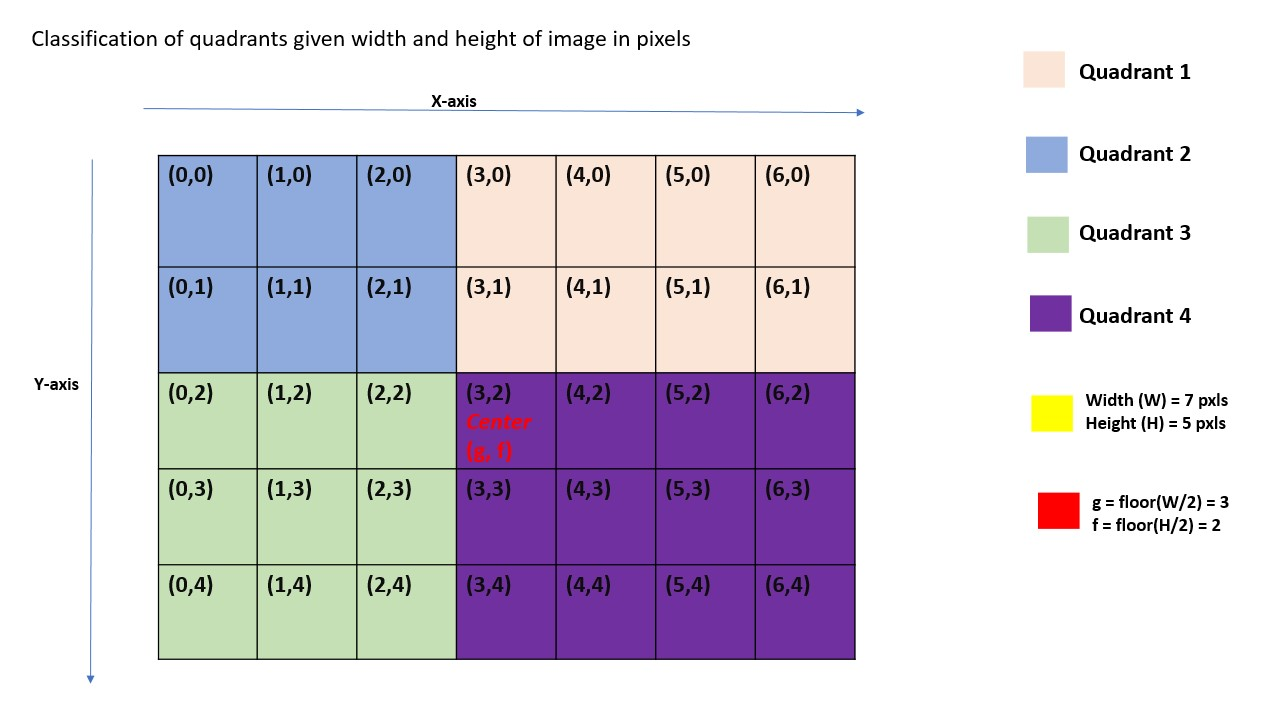

In [ ]:
from IPython.display import Image
Image(filename='/content/img1.jpg',width= 800, height=500)

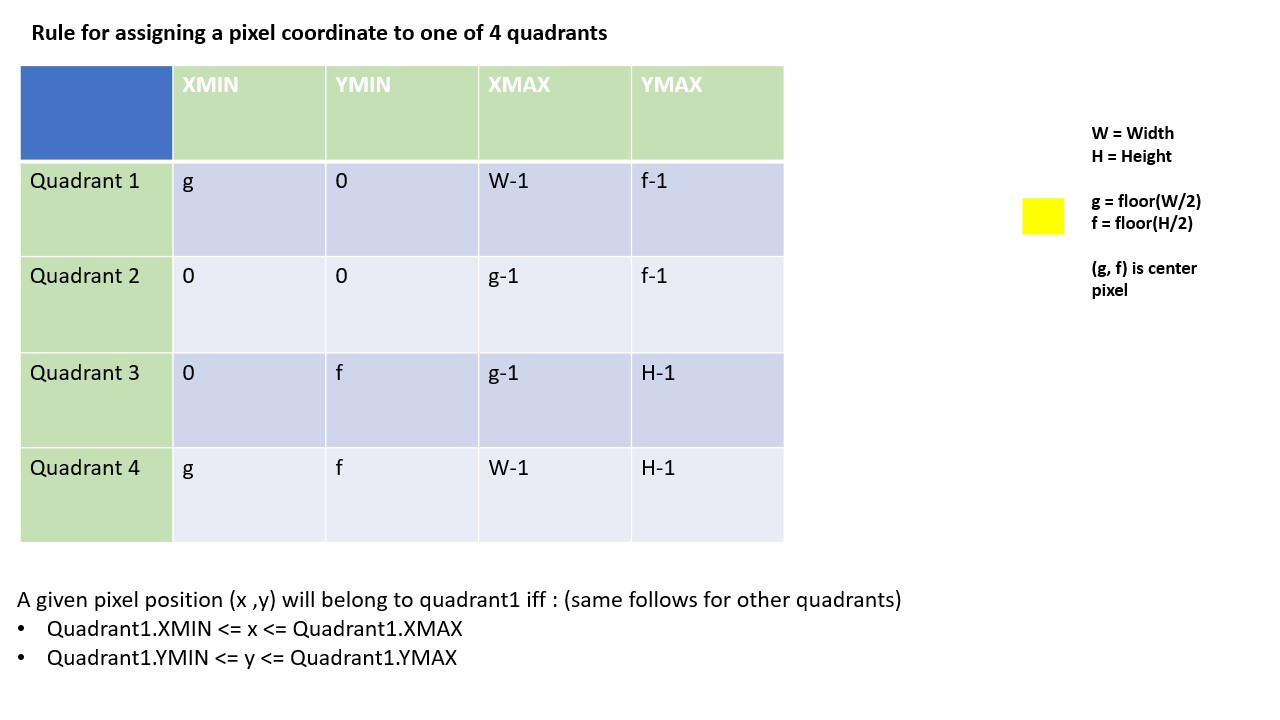

In [ ]:
Image(filename='/content/img2.jpg',width= 800, height=500)

In [ ]:
!unzip "/content/drive/MyDrive/archive.zip"

In [ ]:
#return the quadrant where the object of interest(drone) is present..
def return_quadrant(W,H,x_c,y_c):

  #center of the image..
  g = math.floor(H/2)
  f = math.floor(W/2)

  #get the euclidian distance from the center..
  dis =  np.sqrt((x_c-g)**2 + (y_c-f)**2)

  #get the relative position of bbox w.r.t. center of image..
  xr = abs(x_c - g)
  yr = abs(y_c - f)

  if x_c >= g and x_c <= W-1 and y_c >= 0 and y_c <= f-1:
    cordinates_and_dis = [xr, yr, dis, 1]
  
  elif x_c >= 0 and x_c <= g-1 and y_c >= 0 and y_c <= f-1:
    cordinates_and_dis = [-1*xr, yr, dis, 2]
  
  elif x_c >= 0 and x_c <= g-1 and y_c >= f and y_c <= H-1:
    cordinates_and_dis = [-1*xr, -1*yr, dis, 3]
  
  elif x_c >= g and x_c <= W-1 and y_c >= f and y_c <= H-1:
    cordinates_and_dis = [xr, -1*yr, dis, 4]

  else:
    raise Exception("the given bbox is not present inside the image; check the convention of cordinates with that of xml file!!")

  return cordinates_and_dis  


## For each image categorise the object into 4 quadrants with distance from the origin

In [ ]:
images_paths = glob.glob("/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/*.xml")

In [ ]:
#list of list to store (x,y,dis,quadrant) info for each bounding box in the dataset
data1 = []
for path in track(images_paths):
  with open(path, 'r') as f:

    #get the image
    data = f.read()
    Bs_data = BeautifulSoup(data, "xml")

    #find width and height of the image in pixels..
    W = int(Bs_data.find('width').text)
    H = int(Bs_data.find('height').text)

    #get all objects of interest in the given image..
    all_objects = Bs_data.find_all('object')

    for obj in all_objects:
      xmin = int(obj.find('xmin').text)
      ymin = int(obj.find('ymin').text)
      xmax = int(obj.find('xmax').text)
      ymax = int(obj.find('ymax').text)

      #center of the bounding box ..
      x_c = math.floor((xmin+xmax)/2)
      y_c = math.floor((ymin+ymax)/2)

      print(path)
      info = return_quadrant(W,H,x_c,y_c)
      data1.append(info)


Output()

/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_1152.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_1152.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_1152.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_264.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_182.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_184.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_190.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_1162.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_165.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_283.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_209.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_251.xml
/content/drive/MyDrive/dataset_xml_format/dataset_xml_format/pic_130.xml
/content/drive/MyDrive/dataset_xml_format/datas

In [ ]:
import pandas as pd
df1 = pd.DataFrame(data1, columns = ['x_pos', 'y_pos' , 'euclid_dis' , 'quadrant'])
df1.head(10)

,x_pos,y_pos,euclid_dis,quadrant
0,438,534,690.651866,1
1,883,559,1045.069376,1
2,732,384,826.607525,1
3,-1,60,60.008333,2
4,19,109,110.643572,1
5,137,146,200.212387,1
6,146,193,242.002066,1
7,-20,31,36.891733,2
8,144,77,163.294213,1
9,250,225,336.340601,1


In [ ]:
print('Total number of bounding boxes present in the dataset : ',df1.shape[0])

Total number of bounding boxes present in the dataset :  1092


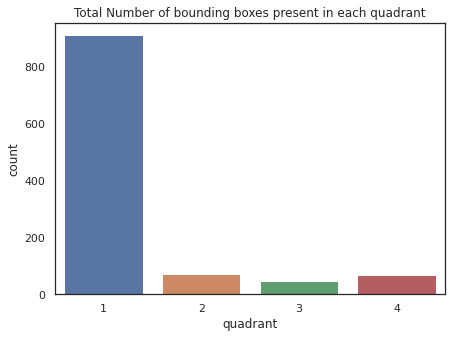

In [ ]:
plt.figure(figsize = (7,5))
plt.title('Total Number of bounding boxes present in each quadrant')
sns.set_theme(style="darkgrid")
sns.countplot(x='quadrant' , data=df1)
plt.show()

### Quadrant wise visulaization

In [ ]:
def get_quad_info(df1 , quad_no):

  info_q = df1[df1['quadrant'] == quad_no]['euclid_dis'].describe()

  plt.figure(figsize = (10,7))
  plt.xlabel('euclid_distance of bbox')
  sns.histplot(df1[df1['quadrant'] == quad_no]['euclid_dis'].values,bins=100,alpha = 0.2, color = 'blue')
  sns.scatterplot(x = [info_q['min']],y = [0], label = 'min='+str(np.round(info_q['min'],4)),s = 200)
  sns.scatterplot(x = [info_q['25%']],y = [0], label = '0.25 percentile='+str(np.round(info_q['25%'],4)),s = 200)
  sns.scatterplot(x = [info_q['50%']],y = [0], label = '0.5 percentile='+str(np.round(info_q['50%'],4)),s = 200)
  sns.scatterplot(x = [info_q['75%']],y = [0], label = '0.75 percentile='+str(np.round(info_q['75%'],4)),s = 200)
  sns.scatterplot(x = [info_q['max']],y = [0], label = 'max='+str(np.round(info_q['max'],4)),s = 200)
  sns.scatterplot(x = [info_q['mean']],y = [0], label = 'mean='+str(np.round(info_q['mean'],4)),s = 1)
  sns.scatterplot(x = [info_q['std']],y = [0], label = 'std='+str(np.round(info_q['std'],4)),s=1)
  plt.title('Statistics of distance of bbox lying in Quadrant : '+str(quad_no))
  plt.legend()
  plt.show()

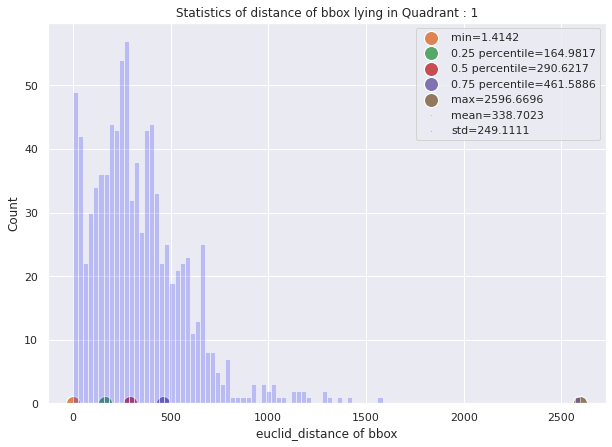

In [ ]:
get_quad_info(df1,1)

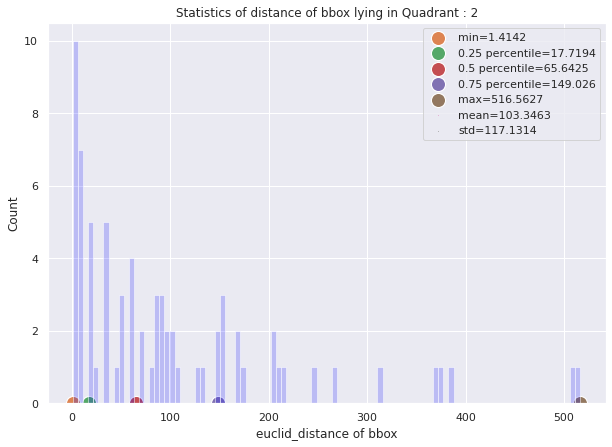

In [ ]:
get_quad_info(df1 , 2)

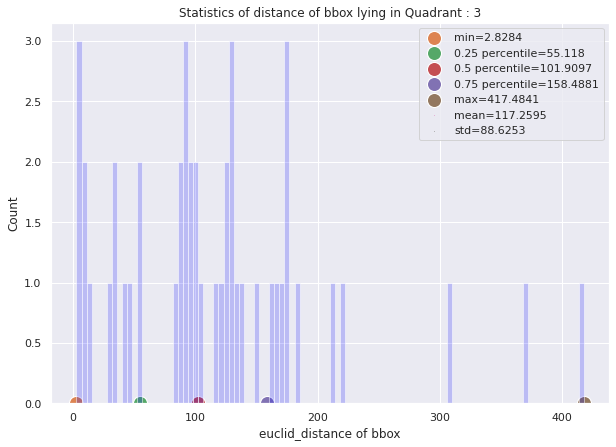

In [ ]:
get_quad_info(df1 , 3)

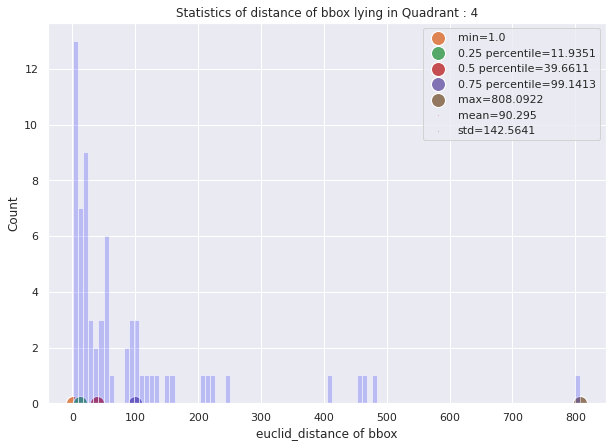

In [ ]:
get_quad_info(df1 , 4)

### Scatter plot of distribution of drones

In [ ]:
#first quadrant is dominating so we take threshold value for radiud from the first quadrant..

r1 = df1[df1['quadrant'] == 1]['euclid_dis'].describe()['25%']
r2 = df1[df1['quadrant'] == 2]['euclid_dis'].describe()['50%']
r3 = df1[df1['quadrant'] == 3]['euclid_dis'].describe()['75%']
r4 = df1[df1['quadrant'] == 4]['euclid_dis'].describe()['mean']

radius_vals = [r1,r2,r3,r4,400,600]
colors = ['green' , 'blue' , 'red' , 'cyan' , 'yellow', 'olive']

#percentage of points within a circle...
contain_ = []
total = df1.shape[0]
for r in radius_vals:
  inside_points = ((df1[df1['euclid_dis'] <= r].shape[0])/total)*100;
  contain_.append(np.round(inside_points,2))

#to store each plot for circle..  
ax1 = -1;ax2=-1;ax3=-1;ax4=-1;ax5=-1;ax6=-1
circles = [ax1 , ax2 , ax3 , ax4 , ax5, ax6]

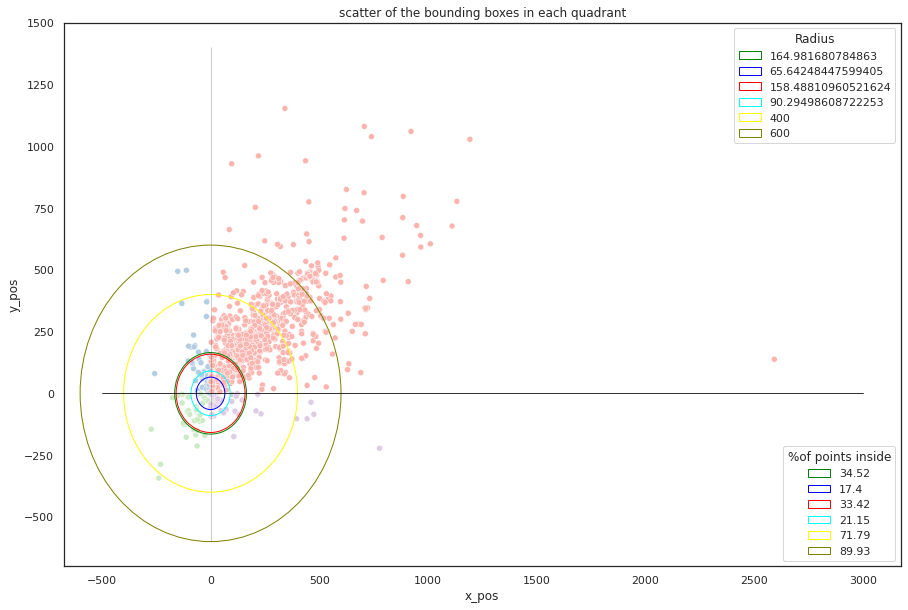

In [ ]:
fig,axes = plt.subplots(figsize = (15,10))

sns.set_theme(style='white')
sns.scatterplot(x='x_pos' , y='y_pos' , data = df1 , hue='quadrant' ,palette = 'Pastel1')
Xt = plt.xticks()[0]
Yt = plt.yticks()[0]
sns.lineplot(x=[np.min(Xt),np.max(Xt)] , y= [0,0] , color = 'black' ,linewidth = 0.8)
sns.lineplot(x=[0,0] , y= [np.min(Yt),np.max(Yt)] , color = 'black' , linewidth = 0.8)

for i in range(len(radius_vals)):
  Drawing_uncolored_circle = plt.Circle( (0, 0 ),
                                        radius_vals[i] ,
                                        fill = False , color = colors[i])
  

  circles[i]  = axes.add_artist(Drawing_uncolored_circle)
  

plt.title('scatter of the bounding boxes in each quadrant')
#plt.axis('off')
legend1 = plt.legend(circles,radius_vals,loc=1,title = 'Radius')
plt.gca().add_artist(legend1)
plt.legend(circles,contain_,loc=4,title = '%of points inside')
plt.show()